<a href="https://colab.research.google.com/github/bjkc/Data-visualization/blob/main/quiz2929.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#bijay raj kc

data visualization

quiz 29

The standard error is the standard deviation of the sampling distribution. A confidence interval specifies a range of plausible values for a statistic and  has an associated confidence level.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t
def SE(std,n):
  return std/np.sqrt(n)
def interval(SE,p):
  return SE*p
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Activity_Dataset_V1.csv')

df.head()

,Unnamed: 0,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,...,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,0,2022-01-01,Freestyle,9.30,77,123,NaN,18.88,168.54,138.30,...,NaN,NaN,112.5,122.0,103,19,28,2,7,50
1,1,2022-01-01,Freestyle,3.44,96,55,NaN,29.65,125.92,292.81,...,NaN,NaN,111.0,122.0,100,42,28,2,29,88
2,2,2022-01-01,Indoor Cycling,6.34,85,33,NaN,17.85,81.93,323.69,...,NaN,NaN,95.0,90.0,100,1,32,0,22,43
3,3,2022-01-01,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,...,28:58,07:58,83.0,85.0,81,3,22,0,24,65
4,4,2022-01-01,Open Water,8.99,36,131,NaN,25.83,64.55,342.89,...,NaN,NaN,138.0,166.0,110,7,0,5,21,88


In [4]:
df1 = df[['workout_type','calories']]
dfgrouped = df1.groupby('workout_type').agg(['mean','std','count'])
dfgrouped = dfgrouped.calories[['mean','std','count']]
dfgrouped

,mean,std,count
workout_type,,,
Cricket,307.548387,149.950609,93
Freestyle,278.552083,163.703768,96
Indoor Cycling,280.450000,156.633322,80
Open Water,296.747253,160.068499,91
Outdoor Cycling,299.129412,158.731263,85
Outdoor Running,301.469136,165.725080,81
Pool Swimming,283.414894,157.576703,94
Trail Run,267.966667,155.748533,90
Treadmill,278.142857,146.963352,98


In [5]:
dfgrouped['SE'] = dfgrouped.apply(lambda x: SE(x['std'],x['count']), axis = 1)
dfgrouped

,mean,std,count,SE
workout_type,,,,
Cricket,307.548387,149.950609,93,15.549154
Freestyle,278.552083,163.703768,96,16.707946
Indoor Cycling,280.450000,156.633322,80,17.512138
Open Water,296.747253,160.068499,91,16.779738
Outdoor Cycling,299.129412,158.731263,85,17.216823
Outdoor Running,301.469136,165.725080,81,18.413898
Pool Swimming,283.414894,157.576703,94,16.252796
Trail Run,267.966667,155.748533,90,16.417337
Treadmill,278.142857,146.963352,98,14.845540


In [6]:
dfgrouped['95%'] = dfgrouped.apply(lambda x: interval(x['SE'],t.ppf(.975,49)), axis = 1)
dfgrouped

,mean,std,count,SE,95%
workout_type,,,,,
Cricket,307.548387,149.950609,93,15.549154,31.247194
Freestyle,278.552083,163.703768,96,16.707946,33.575874
Indoor Cycling,280.450000,156.633322,80,17.512138,35.191958
Open Water,296.747253,160.068499,91,16.779738,33.720146
Outdoor Cycling,299.129412,158.731263,85,17.216823,34.598501
Outdoor Running,301.469136,165.725080,81,18.413898,37.004113
Pool Swimming,283.414894,157.576703,94,16.252796,32.661216
Trail Run,267.966667,155.748533,90,16.417337,32.991874
Treadmill,278.142857,146.963352,98,14.845540,29.833230


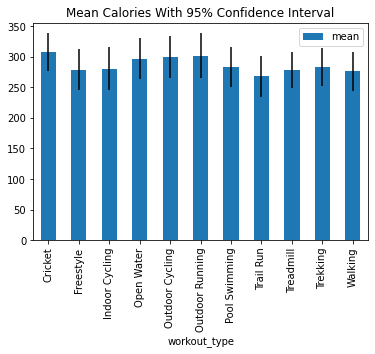

In [7]:
dfgrouped.plot.bar(y = 'mean', yerr = '95%', title = 'Mean Calories With 95% Confidence Interval')